# HW4 Problem 7 Implementation

For constants $c$ and $n$, consider the discrete distribution function $U_{c,n}$, which is uniform on $n+1$ points in the range $\{0,\frac{c}{n},\frac{2c}{n},\dots,c\}$:

$$
P[U_{c,n}=x] = \{ \begin{array}{ll}
\frac{1}{n+1}  & \mbox{if} ~ x=\frac{ic}{n}, ~ 0\leq i\leq n \\
0 & \mbox{otherwise}.
\end{array}
$$
Let $\bar{x}= (x_1,x_2,\dots,x_m)$ be a sample of $m$ values chosen independently from the distribution. We define:

![image](hw4_7.png)

(a) Repeat the following with $c=1$ and $c=10$, and sample sizes $m=4$ and $m=1000$: 

Plot the 4 empirical statistics defined above as a function of $n$ for $n=10,20,\dots,100$.

**Note:** You should have four plots, with four separate quantities graphed on each;\\ ($c=1$ and $m=4$), ($c=1$ and $m=1000$), ($c=10$ and $m=4$), etc.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def sampling_uniform_distribution(c, n, m):
    """Sample m values from U_{c,n} distribution."""
    random_state = np.random.RandomState(seed=42)
    values = np.linspace(0, c, n+1)
    return random_state.choice(values, m)

def empirical_statistics(samples):
    """Calculate empirical statistics for a sample."""
    m = len(samples)
    mean = np.sum(samples)/m
    mean_square = np.sum(np.square(samples))/m
    var = mean_square - (mean)**2
    std = np.sqrt(var)
    
    return mean, mean_square, var, std

def plot_statistics(c, m):
    """Plot empirical statistics for given c and m."""
    n_values = list(range(10, 101, 10))
    means, mean_squares, variances, stds = [], [], [], []
    
    for n in n_values:
        samples = sampling_uniform_distribution(c, n, m)
        mean, mean_square, var, std = empirical_statistics(samples)
        means.append(mean)
        mean_squares.append(mean_square)
        variances.append(var)
        stds.append(std)
        
    df = pd.DataFrame({'n': n_values,
                       'expectation': means,
                       'second_moment': mean_squares,
                       'variance': variances,
                       'standard_deviation': stds})    
    
    plt.figure(figsize=(8, 6))
    plt.grid(True)
    plt.plot(n_values, means, label='expectation')
    plt.plot(n_values, mean_squares, label='second_moment')
    plt.plot(n_values, variances, label='variance')
    plt.plot(n_values, stds, label='standard_deviation')
    plt.title(f'Empirical Statistics for c={c} and m={m}')
    plt.xlabel('n')
    plt.legend()
    plt.show()
    
    return df

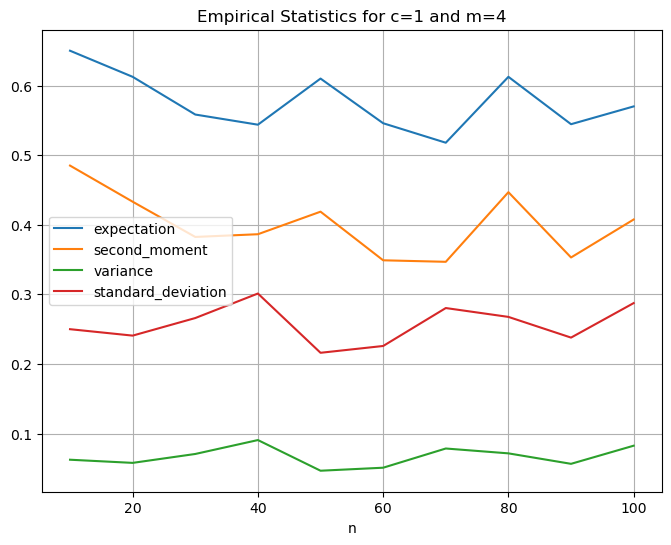

c=1, m=4


,n,expectation,second_moment,variance,standard_deviation
0,10,0.650000,0.485000,0.062500,0.250000
1,20,0.612500,0.433125,0.057969,0.240767
2,30,0.558333,0.382500,0.070764,0.266015
3,40,0.543750,0.386406,0.090742,0.301234
4,50,0.610000,0.418800,0.046700,0.216102
5,60,0.545833,0.348958,0.051024,0.225886
6,70,0.517857,0.346786,0.078610,0.280374
7,80,0.612500,0.446797,0.071641,0.267658
8,90,0.544444,0.353025,0.056605,0.237918
9,100,0.570000,0.407550,0.082650,0.287489


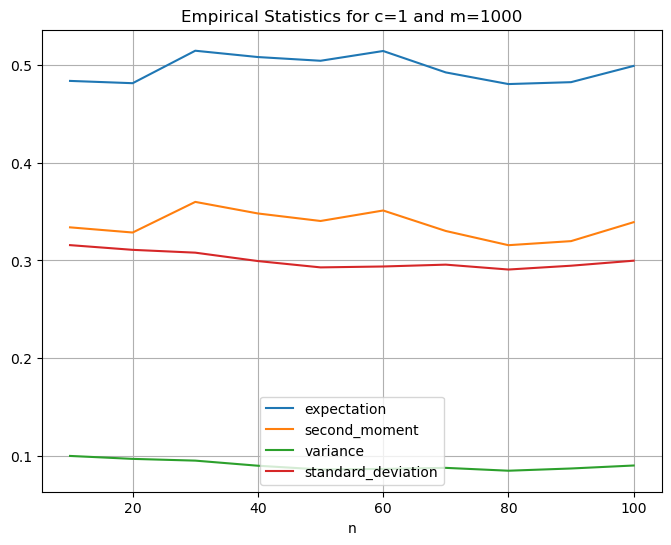

c=1, m=1000


,n,expectation,second_moment,variance,standard_deviation
0,10,0.484000,0.333920,0.099664,0.315696
1,20,0.481650,0.328628,0.096641,0.310871
2,30,0.514933,0.360007,0.094850,0.307978
3,40,0.508450,0.348145,0.089624,0.299372
4,50,0.504640,0.340442,0.085781,0.292884
5,60,0.514650,0.351190,0.086326,0.293812
6,70,0.492700,0.330193,0.087440,0.295702
7,80,0.480763,0.315637,0.084505,0.290697
8,90,0.482711,0.319801,0.086791,0.294604
9,100,0.499370,0.339221,0.089851,0.299751


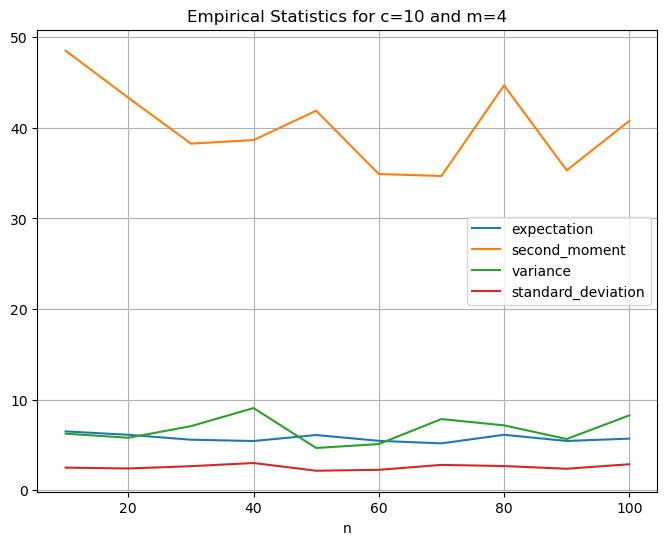

c=10, m=4


,n,expectation,second_moment,variance,standard_deviation
0,10,6.500000,48.500000,6.250000,2.500000
1,20,6.125000,43.312500,5.796875,2.407670
2,30,5.583333,38.250000,7.076389,2.660148
3,40,5.437500,38.640625,9.074219,3.012344
4,50,6.100000,41.880000,4.670000,2.161018
5,60,5.458333,34.895833,5.102431,2.258856
6,70,5.178571,34.678571,7.860969,2.803742
7,80,6.125000,44.679688,7.164062,2.676577
8,90,5.444444,35.302469,5.660494,2.379179
9,100,5.700000,40.755000,8.265000,2.874891


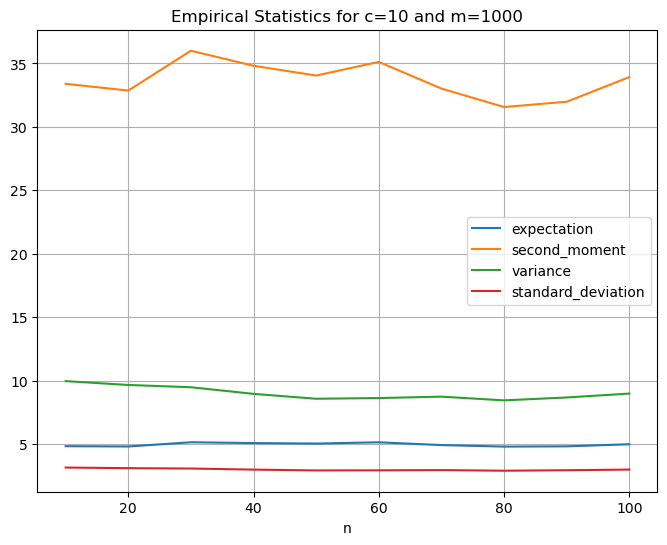

c=10, m=1000


,n,expectation,second_moment,variance,standard_deviation
0,10,4.840000,33.392000,9.966400,3.156961
1,20,4.816500,32.862750,9.664078,3.108710
2,30,5.149333,36.000667,9.485033,3.079778
3,40,5.084500,34.814500,8.962360,2.993720
4,50,5.046400,34.044240,8.578087,2.928837
5,60,5.146500,35.119028,8.632566,2.938123
6,70,4.927000,33.019286,8.743957,2.957018
7,80,4.807625,31.563734,8.450476,2.906970
8,90,4.827111,31.980148,8.679146,2.946039
9,100,4.993700,33.922090,8.985050,2.997507


In [32]:
# Plot for each combination of c and m
for c in [1, 10]:
    for m in [4, 1000]:
        sample_df = plot_statistics(c, m)
        print(f'c={c}, m={m}')
        display(sample_df)

(b) Compute analytically $E[X]$, $E[X^2]$, $Var[X]$, and $\sigma[X]$ for $X\sim U_{c,n}$ as functions of $n$.

**Hint:** You may use the series identity $\sum_{i=0}^k i^2 = \frac{k(k+1)(2k+1)}{6}.$

**Answer:**

$$E[X] = \frac{c}{n(n+1)} \sum_{i=0}^{n} i = \frac{c}{2}.$$
$$E[X^2] = \frac{c^2}{n^2(n+1)} \sum_{i=0}^{n} i^2 = \frac{c^2(2n+1)}{6n}.$$
$$Var[X] = E[X^2] - E[X]^2 = \frac{c^2(2n+1)}{6n} - \frac{c^2}{4} = \frac{c^2(n+2)}{12n}.$$
$$\sigma[X] = \sqrt{Var[X]} = \sqrt{\frac{c^2(n+2)}{12n}}.$$


In [33]:
def plot_true_statistics(c):
    """Plot empirical statistics for given c and m."""
    n_values = list(range(10, 101, 10))
    means, mean_squares, variances, stds = [], [], [], []

    for n in n_values:
        mean = c/2
        mean_square = c**2 * (2*n+1)/(6*n)
        var = c**2 * (n+2)/(12*n)
        std = np.sqrt(var)
        means.append(mean)
        mean_squares.append(mean_square)
        variances.append(var)
        stds.append(std)

    df = pd.DataFrame({'n': n_values,
                       'analytical_expectation': means,
                       'analytical_second_moment': mean_squares,
                       'analytical_variance': variances,
                       'analytical_standard_deviation': stds})

    plt.figure(figsize=(8, 6))
    plt.grid(True)
    plt.plot(n_values, means, label='expectation')
    plt.plot(n_values, mean_squares, label='second_moment')
    plt.plot(n_values, variances, label='variance')
    plt.plot(n_values, stds, label='standard_deviation')
    plt.title(f'Analytical Statistics for c={c}')
    plt.xlabel('n')
    plt.legend()
    plt.show()

    return df

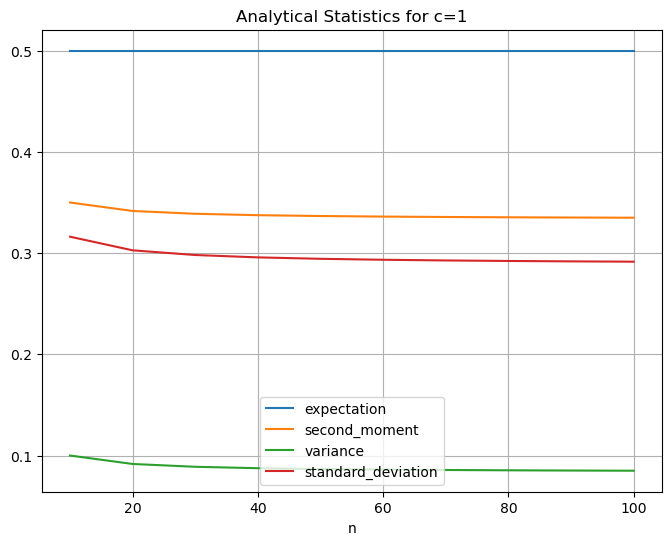

c=1


,n,analytical_expectation,analytical_second_moment,analytical_variance,analytical_standard_deviation
0,10,0.5,0.350000,0.100000,0.316228
1,20,0.5,0.341667,0.091667,0.302765
2,30,0.5,0.338889,0.088889,0.298142
3,40,0.5,0.337500,0.087500,0.295804
4,50,0.5,0.336667,0.086667,0.294392
5,60,0.5,0.336111,0.086111,0.293447
6,70,0.5,0.335714,0.085714,0.292770
7,80,0.5,0.335417,0.085417,0.292261
8,90,0.5,0.335185,0.085185,0.291865
9,100,0.5,0.335000,0.085000,0.291548


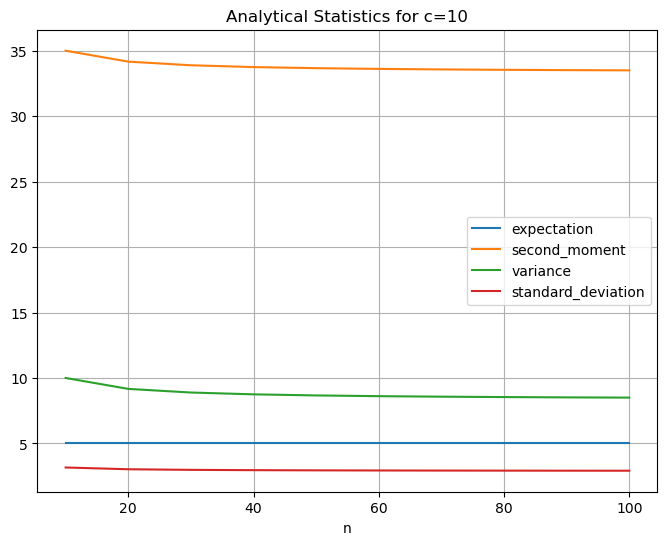

c=10


,n,analytical_expectation,analytical_second_moment,analytical_variance,analytical_standard_deviation
0,10,5.0,35.000000,10.000000,3.162278
1,20,5.0,34.166667,9.166667,3.027650
2,30,5.0,33.888889,8.888889,2.981424
3,40,5.0,33.750000,8.750000,2.958040
4,50,5.0,33.666667,8.666667,2.943920
5,60,5.0,33.611111,8.611111,2.934469
6,70,5.0,33.571429,8.571429,2.927700
7,80,5.0,33.541667,8.541667,2.922613
8,90,5.0,33.518519,8.518519,2.918650
9,100,5.0,33.500000,8.500000,2.915476


In [34]:
# Plot for each c
for c in [1, 10]:
    sample_df = plot_true_statistics(c)
    print(f'c={c}')
    display(sample_df)

(c) Compute $\lim_{n \to \infty} $ of the above functions: $E[X]$, $E[X^2]$, $Var[X]$, and $\sigma[X]$.


**Answer:**

$$\lim_{n \to \infty} E[X] = \lim_{n \to \infty} \frac{c}{2} = \frac{c}{2}.$$
$$\lim_{n \to \infty}E[X^2] = \lim_{n \to \infty} \frac{c^2(2n+1)}{6n} = \frac{c^2}{3}.$$
$$\lim_{n \to \infty} Var[X] = \lim_{n \to \infty} \frac{c^2(n+2)}{12n}=\frac{c^2}{12}.$$
$$\lim_{n \to \infty}\sigma[X] = \lim_{n \to \infty} \sqrt{\frac{c^2(n+2)}{12n}} = \sqrt{\frac{c^2}{12}}. $$


In [35]:
for c in [1, 10]:
    print(f'c={c}:')
    print('lim_expectation:', c/2)
    print('lim_second_moment:', c**2/3)
    print('lim_variance:', c**2/12)
    print('lim_std:', np.sqrt(1/12)*c)

c=1:
lim_expectation: 0.5
lim_second_moment: 0.3333333333333333
lim_variance: 0.08333333333333333
lim_std: 0.28867513459481287
c=10:
lim_expectation: 5.0
lim_second_moment: 33.333333333333336
lim_variance: 8.333333333333334
lim_std: 2.8867513459481287


(d): How do the analytical results compare to your plots?

**Answer:** Firstly, as the number of sampling gets larger, the plots will fluctuate less and is more close to the analytical result. Secondly, as n gets larger, the empirical plot tends to decrease to a certain value (except expectation: it's always near a certain value).

